In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
DATASET_DIR = '../datasets/SIMARGL2022'
DOCS_DIR = "./docs"

os.makedirs(DOCS_DIR,exist_ok=True)


In [4]:
def load_simargl_data(DATASET_DIR, DOCS_DIR, SAMPLE_FILE_NAME='sampled_data.csv', sample_frac=0.20):
    SAMPLE_FILE = os.path.join(DOCS_DIR, SAMPLE_FILE_NAME)

    # File definitions
    file_groups = {
        'dos': [
            'dos-03-15-2022-15-44-32.csv',
            'dos-03-16-2022-13-45-18.csv',
            'dos-03-17-2022-16-22-53.csv',
            'dos-03-18-2022-19-27-05.csv',
            'dos-03-19-2022-20-01-53.csv',
            'dos-03-20-2022-14-27-54.csv',
        ],
        'malware': [
            'malware-03-25-2022-17-57-07.csv'
        ],
        'normal': [
            'normal-03-15-2022-15-43-44.csv',
            'normal-03-16-2022-13-44-27.csv',
            'normal-03-17-2022-16-21-30.csv',
            'normal-03-18-2022-19-17-31.csv',
            'normal-03-18-2022-19-25-48.csv',
            'normal-03-19-2022-20-01-16.csv',
            'normal-03-20-2022-14-27-30.csv',
        ],
        'portscanning': [
            'portscanning-03-15-2022-15-44-06.csv',
            'portscanning-03-16-2022-13-44-50.csv',
            'portscanning-03-17-2022-16-22-53.csv',
            'portscanning-03-18-2022-19-27-05.csv',
            'portscanning-03-19-2022-20-01-45.csv',
            'portscanning-03-20-2022-14-27-49.csv',
        ]
    }

    if os.path.exists(SAMPLE_FILE):
        print(f"✅ Loading sampled SIMARGL dataset from {SAMPLE_FILE}...")
        df = pd.read_csv(SAMPLE_FILE)
        print(f"📊 Loaded sampled dataset shape: {df.shape}")
        return df

    print(f"⚠️ Sample file not found at {SAMPLE_FILE}. Loading original SIMARGL datasets...")

    all_dfs = []

    for label, files in file_groups.items():
        for i, fname in enumerate(files):
            fpath = os.path.join(DATASET_DIR, fname)
            try:
                temp_df = pd.read_csv(fpath)
                temp_df['label'] = label
                all_dfs.append(temp_df)
                print(f"✅ Loaded [{label}] file {i+1}: {fname} - shape {temp_df.shape}")
            except FileNotFoundError:
                print(f"⚠️ File not found: {fpath}. Skipping...")
            except Exception as e:
                print(f"❌ Error loading {fpath}: {str(e)}")

    if not all_dfs:
        print("⚠️ No datasets loaded. Creating dummy fallback dataset...")
        np.random.seed(42)
        dummy_df = pd.DataFrame(
            np.random.randn(5000, 30),
            columns=[f'feature_{i}' for i in range(30)]
        )
        dummy_df['label'] = np.random.choice(['dos', 'normal', 'malware', 'portscanning'], size=5000)
        return dummy_df

    # Combine and sample
    full_df = pd.concat(all_dfs, ignore_index=True)
    print(f"📦 Combined SIMARGL dataset shape: {full_df.shape}")

    sampled_df = full_df.sample(frac=sample_frac, random_state=42).reset_index(drop=True)
    print(f"📊 Sampled SIMARGL dataset shape: {sampled_df.shape}")

    try:
        sampled_df.to_csv(SAMPLE_FILE, index=False)
        print(f"✅ Sampled dataset saved to {SAMPLE_FILE}")
    except Exception as e:
        print(f"❌ Error saving sampled dataset: {str(e)}")

    return sampled_df


In [5]:
df = load_simargl_data(DATASET_DIR, DOCS_DIR, sample_frac=0.1)

✅ Loading sampled SIMARGL dataset from ./docs\sampled_data.csv...
📊 Loaded sampled dataset shape: (3014826, 33)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014826 entries, 0 to 3014825
Data columns (total 33 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   flow_id                     int64  
 1   protocol_map                object 
 2   l4_src_port                 int64  
 3   ipv4_src_addr               object 
 4   l4_dst_port                 int64  
 5   ipv4_dst_addr               object 
 6   first_switched              int64  
 7   flow_duration_milliseconds  int64  
 8   last_switched               int64  
 9   protocol                    int64  
 10  tcp_flags                   int64  
 11  tcp_win_max_in              int64  
 12  tcp_win_max_out             int64  
 13  tcp_win_min_in              int64  
 14  tcp_win_min_out             int64  
 15  tcp_win_mss_in              int64  
 16  tcp_win_scale_in            int64  
 17  tcp_win_scale_out           int64  
 18  src_tos                     int64  
 19  dst_tos              

In [6]:
df.head()

,FLOW_ID,PROTOCOL_MAP,L4_SRC_PORT,IPV4_SRC_ADDR,L4_DST_PORT,IPV4_DST_ADDR,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LAST_SWITCHED,PROTOCOL,...,TOTAL_PKTS_EXP,TOTAL_BYTES_EXP,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,ALERT,ANALYSIS_TIMESTAMP,label,ANOMALY
0,356579549,tcp,56962,10.114.241.191,443,10.114.224.73,1647515668,7130,1647515675,6,...,0,0,240,4,0,0,Denial of Service,1647515720,dos,NaN
1,367378020,tcp,33216,10.114.241.166,58939,10.114.224.151,1647679889,0,1647679889,6,...,0,0,44,1,40,1,Port Scanning,1647679992,portscanning,1.0
2,352013022,udp,42836,10.114.225.205,53,10.114.241.113,1647446333,1,1647446333,17,...,0,0,95,1,180,1,NaN,1647446403,normal,NaN
3,350798142,udp,48481,10.114.226.5,53,204.74.108.252,1647434871,33,1647434871,17,...,0,0,84,1,208,1,NaN,1647434909,normal,NaN
4,364558533,icmp,0,35.161.143.192,0,10.114.226.5,1647611427,0,1647611427,1,...,0,0,36,1,0,0,NaN,1647611468,normal,NaN


In [7]:
label_counts = df['label'].value_counts()
print(label_counts)


label
normal          1955477
dos              641831
portscanning     417455
malware              63
Name: count, dtype: int64


In [8]:
# Clean column names
df.columns = df.columns.str.lower().str.strip()


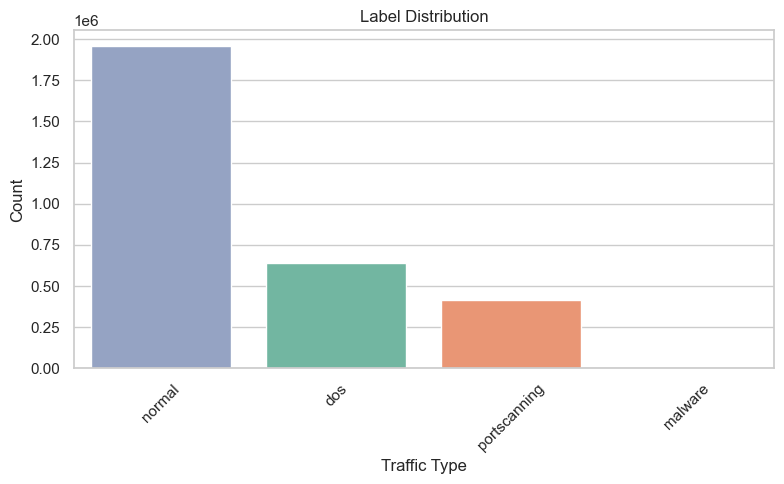

In [20]:
# 1. Label Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='Set2',hue="label")
plt.title("Label Distribution")
plt.xlabel("Traffic Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

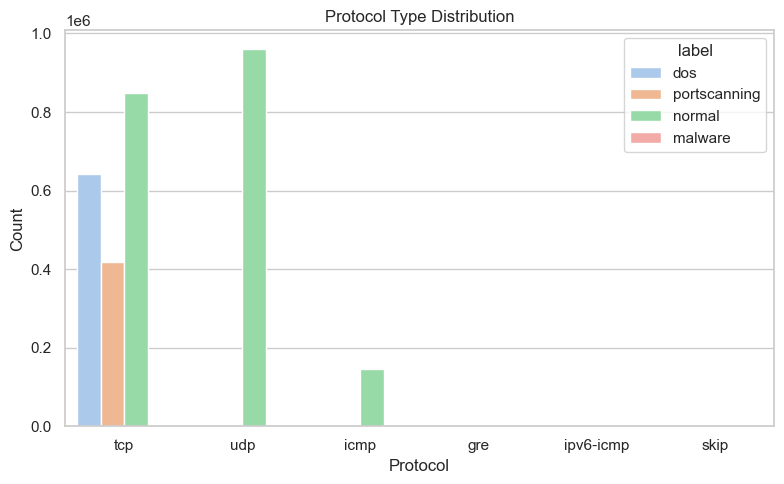

In [19]:
# 2. PROTOCOL_MAP (TCP/UDP/ICMP) Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='protocol_map', palette='pastel',hue="label")
plt.title("Protocol Type Distribution")
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

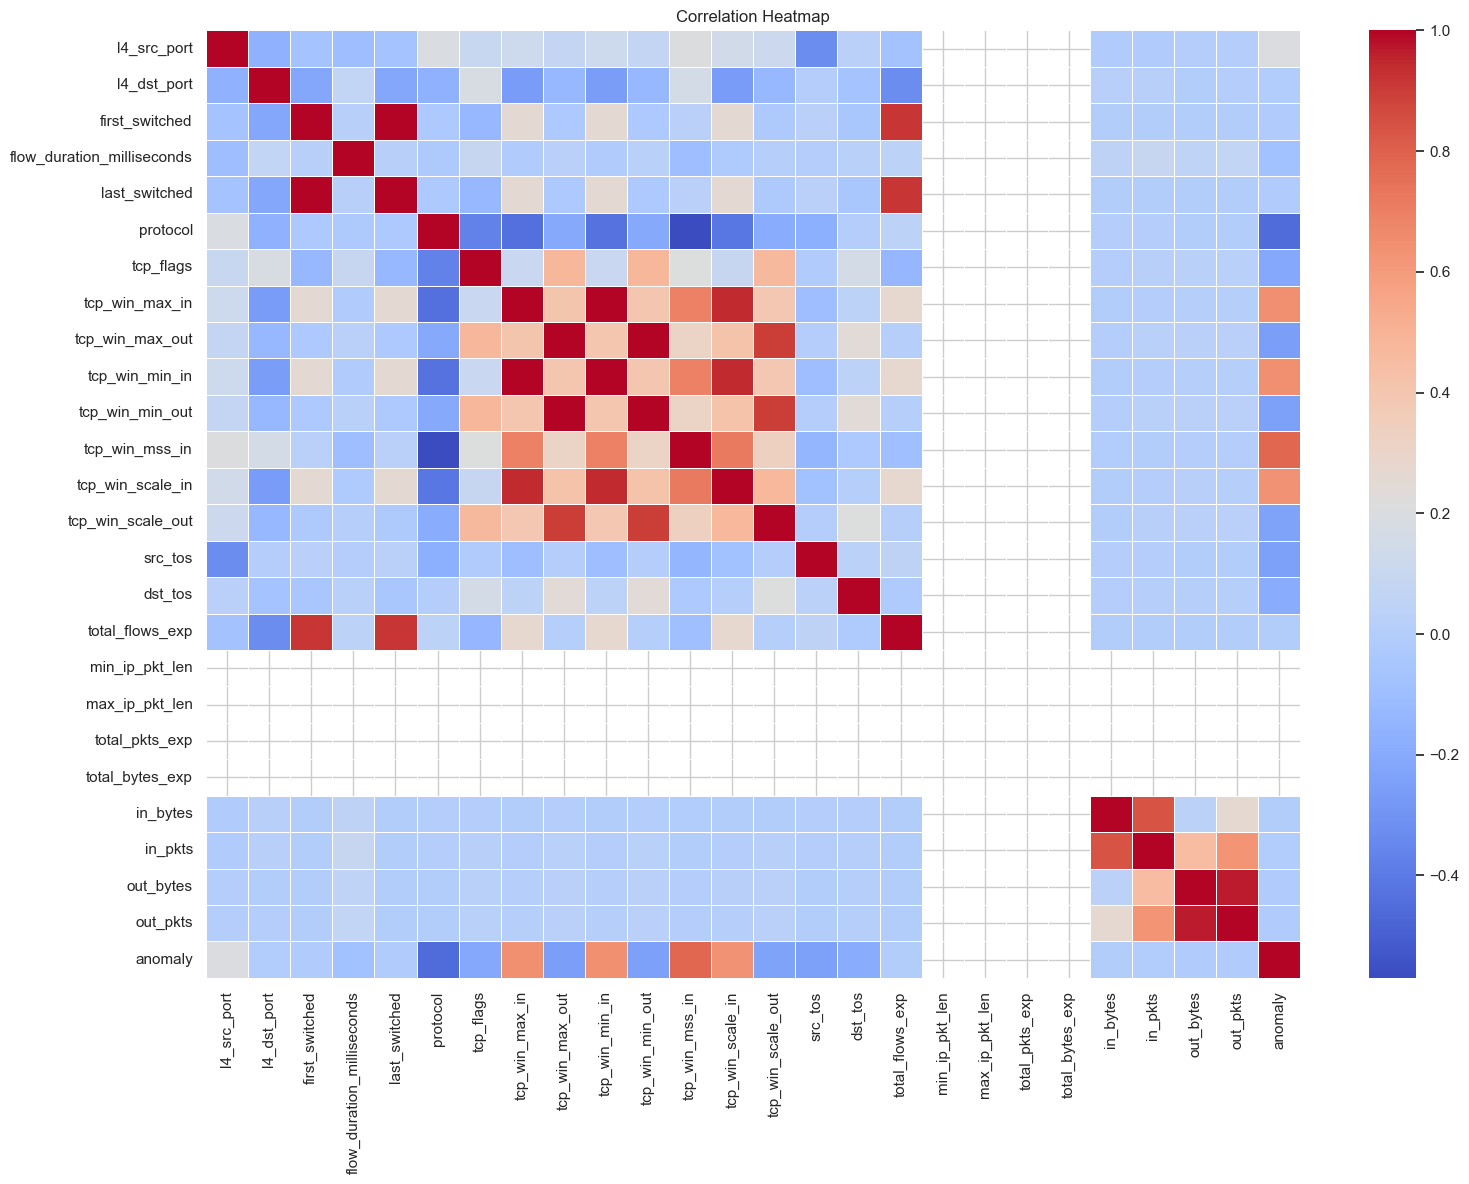

In [11]:
# 3. Correlation Heatmap of Numeric Features
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['flow_id', 'analysis_timestamp'])
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

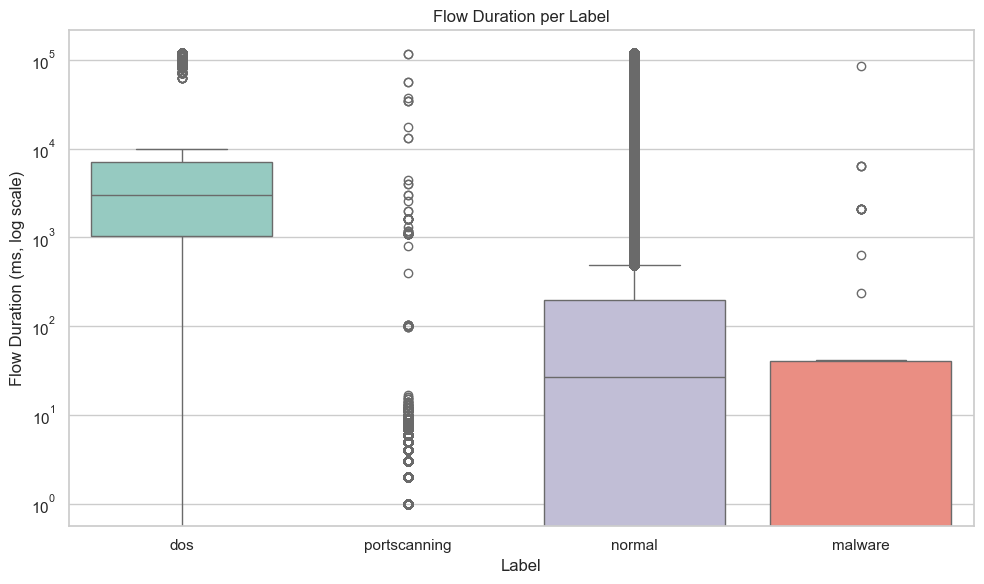

In [18]:
# 4. Boxplot: FLOW_DURATION_MILLISECONDS by Label
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='flow_duration_milliseconds', palette='Set3',hue="label")
plt.yscale('log')  # For skewed data
plt.title("Flow Duration per Label")
plt.xlabel("Label")
plt.ylabel("Flow Duration (ms, log scale)")
plt.tight_layout()
plt.show()

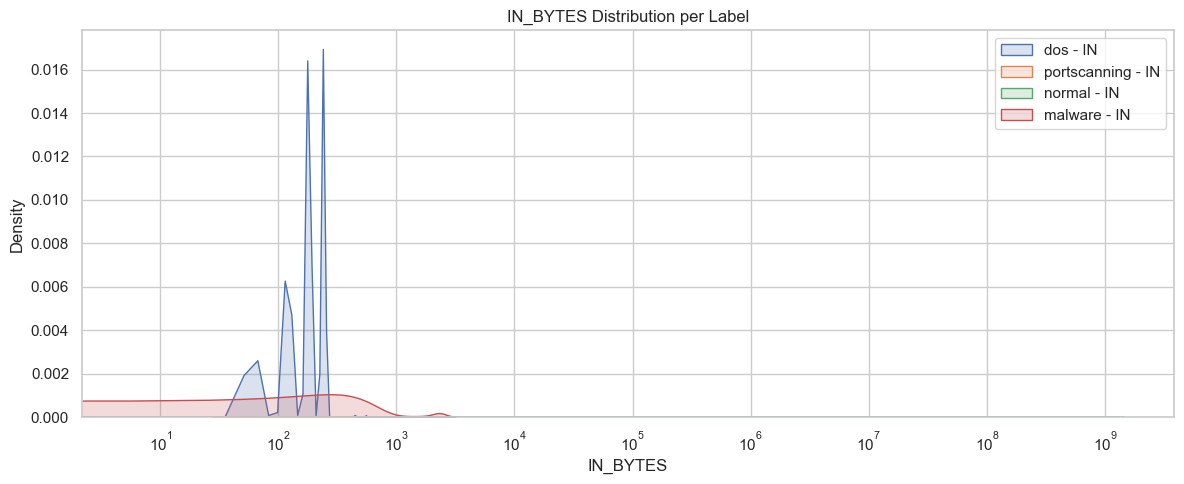

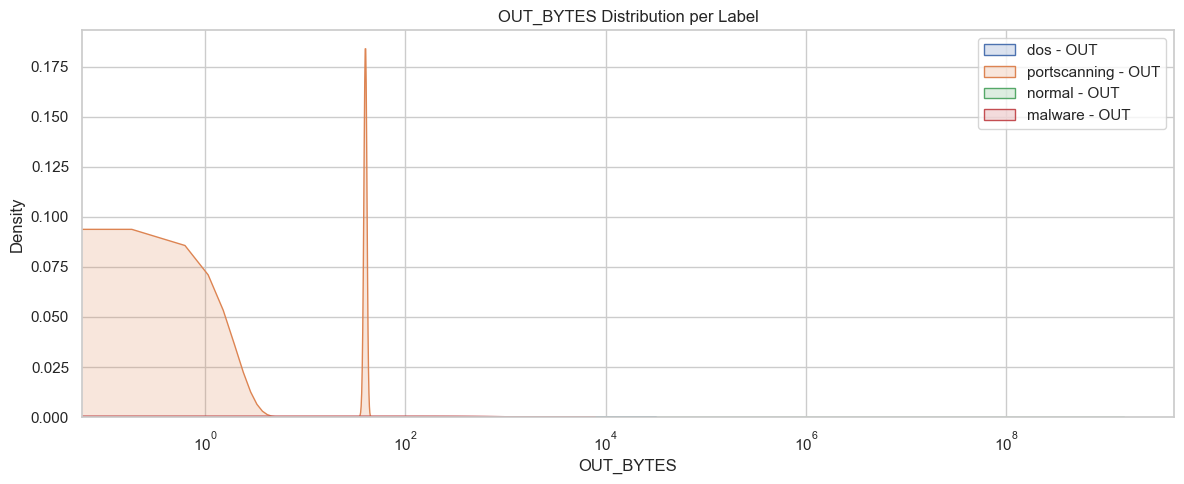

In [13]:
# 5. KDE Plot: IN_BYTES and OUT_BYTES per Class (Overlay)
plt.figure(figsize=(12, 5))

for label in df['label'].unique():
    subset = df[df['label'] == label]
    sns.kdeplot(subset['in_bytes'], label=f"{label} - IN", fill=True, alpha=0.2)
    
plt.title("IN_BYTES Distribution per Label")
plt.xlabel("IN_BYTES")
plt.legend()
plt.xscale("log")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

for label in df['label'].unique():
    subset = df[df['label'] == label]
    sns.kdeplot(subset['out_bytes'], label=f"{label} - OUT", fill=True, alpha=0.2)

plt.title("OUT_BYTES Distribution per Label")
plt.xlabel("OUT_BYTES")
plt.legend()
plt.xscale("log")
plt.tight_layout()
plt.show()

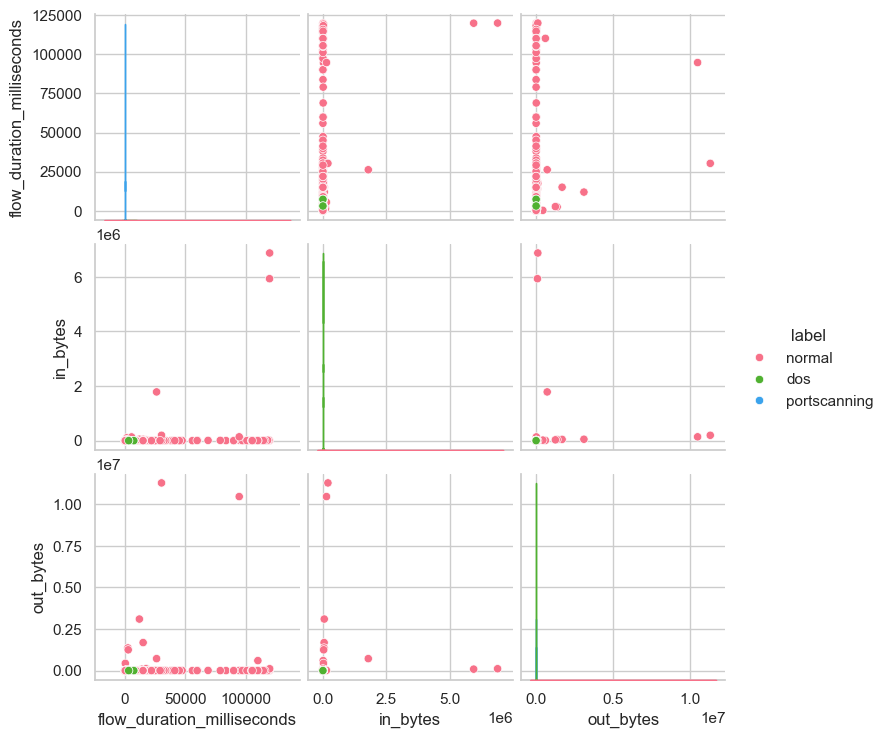

In [16]:
# 6. Pairplot (Optional – limited to performance)
sns.pairplot(df.sample(1500), hue="label", vars=["flow_duration_milliseconds", "in_bytes", "out_bytes"], palette='husl')
plt.show()